In [1]:
import numpy as np
from Clasificador import Clasificador, ClasificadorNaiveBayes
from Datos import Datos
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder

from astropy.table import QTable, Table, Column

datosGerman = Datos('german.data',predNominal=True)
datosTic = Datos('tic-tac-toe.data',predNominal=True)

cl = ClasificadorNaiveBayes()
cll = ClasificadorNaiveBayes(laplace=True)

Particionado

In [4]:
def showParticiones(val,datos):
    val.creaParticiones(datos)
    print('Número de particiones: ', len(val.particiones))
    for i in range(len(val.particiones)):
        print('Partición número ', i)
        print('Número de índices del trainSet:')
        print(len(val.particiones[i].indicesTrain))
        print('Número de índices del testSet:')
        print(len(val.particiones[i].indicesTest))
        print()

In [17]:
propTest = 0.2 #Proporción de datos destinados al testSet
numEx = 20 # Número de ejecuciones de la validación simple
print('Particionado simple:')
valS = ValidacionSimple(0.2,20)
showParticiones(valS,datosGerman)

print('\n\n')
print('Particionado cruzado:')
numEx = 6 # Número de ejecuciones de la validación cruzada
valC = ValidacionCruzada(numEx)
showParticiones(valC, datosGerman)

Particionado simple:
Número de particiones:  20
Partición número  0
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  1
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  2
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  3
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  4
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  5
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  6
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  7
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  8
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  9
Número de índices del trainSet:
800
Número de índices del testSet:
200

Partición número  10
Número de í

Faltaría lo mismo para datosTic, pero me parece demasiado redundante

Naive-Bayes, German

In [18]:
propTest = 0.8 #Proporción de datos destinados al testSet
numEx = 50 # Número de ejecuciones de la validación simple
valS = ValidacionSimple(propTest,numEx)

# Validación Simple con y sin Laplace
errSL = cll.validacion(valS,datosGerman)
errS = cl.validacion(valS,datosGerman)

numEx = 10 # Número de ejecuciones de la validación cruzada
valC = ValidacionCruzada(numEx)

# Validación Cruzada con y sin Laplace
errCL = cll.validacion(valC,datosGerman)
errC = cl.validacion(valC,datosGerman)

print('Tabla de medias: \n')
laplace = ['No','Sí']
simple = [np.mean(errS),np.mean(errSL)]
cruzada = [np.mean(errC),np.mean(errCL)]
t = Table([laplace,simple,cruzada],names=['Laplace','Simple','Cruzada'])
print(t)

print('\n\n Tabla de desviaciones típicas:\n')
laplace = ['No','Sí']
simple = [np.std(errS),np.std(errSL)]
cruzada = [np.std(errC),np.std(errCL)]
t = Table([laplace,simple,cruzada],names=['Laplace','Simple','Cruzada'])
print(t)

Tabla de medias: 

Laplace        Simple             Cruzada      
------- ------------------- -------------------
     No 0.38082499999999997 0.28200000000000003
     Sí 0.39922500000000005 0.44800000000000006


 Tabla de desviaciones típicas:

Laplace        Simple             Cruzada       
------- ------------------- --------------------
     No 0.09492846319729399 0.023579652245103187
     Sí  0.1095168052172816  0.09086253353280438


Naive-Bayes, Tic Tac Toe

In [24]:
propTest = 0.8 #Proporción de datos destinados al testSet
numEx = 50 # Número de ejecuciones de la validación simple
valS = ValidacionSimple(propTest,numEx)

# Validación Simple con y sin Laplace
errSL = cll.validacion(valS,datosTic)
errS = cl.validacion(valS,datosTic)

numEx = 5 # Número de ejecuciones de la validación cruzada
valC = ValidacionCruzada(numEx)

# Validación Cruzada con y sin Laplace
errCL = cll.validacion(valC,datosGerman)
errC = cl.validacion(valC,datosGerman)

print('Tabla de medias: \n')
laplace = ['No','Sí']
simple = [np.mean(errS),np.mean(errSL)]
cruzada = [np.mean(errC),np.mean(errCL)]
t = Table([laplace,simple,cruzada],names=['Laplace','Simple','Cruzada'])
print(t)

print('\n\nTabla de desviaciones típicas:\n')
laplace = ['No','Sí']
simple = [np.std(errS),np.std(errSL)]
cruzada = [np.std(errC),np.std(errCL)]
t = Table([laplace,simple,cruzada],names=['Laplace','Simple','Cruzada'])
print(t)

Tabla de medias: 

Laplace        Simple             Cruzada      
------- ------------------- -------------------
     No 0.30678851174934724 0.29100000000000004
     Sí  0.3076240208877285 0.28099999999999997


Tabla de desviaciones típicas:

Laplace        Simple              Cruzada       
------- -------------------- --------------------
     No 0.017721902062301117  0.03541186241925155
     Sí 0.014639489009278328 0.018275666882497058


Scikit-learn, german. Aquí aplicaremos naive-bayes continuo, ya que es más lógico usarlo aquí que en tic-tac-toe. Al querer repetir más de una vez la validación simple, lo haremos a manita.

In [2]:
propTest = 0.2 #Proporción de datos destinados al testSet
numEx = 50 # Número de ejecuciones de la validación simple
# Necesitamos separar atributos de la clasificación
X, y = datosGerman.datos[:,:-1], datosGerman.datos[:,-1].astype('int')
mult = GaussianNB()
errS = []
for _ in range(numEx):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=propTest)
    mult.fit(X_train,y_train)
    err = 1 - mult.score(X_test,y_test)
    errS.append(err)

meanS, stdS = np.mean(errS), np.std(errS)


numEx = 5 # Número de ejecuciones de la validación cruzada

# Validación Cruzada
errC = 1 - cross_val_score(mult,X,y,cv=numEx)
meanC, stdC = np.mean(errC), np.std(errC)

print('Tabla de medias y desviaciones típicas de los errores: \n')
param = ['Media','D. Típica']
simple = [meanS,stdS]
cruzada = [meanC,stdC]
t = Table([param,simple,cruzada],names=['Parámetro','Simple','Cruzada'])
print(t)

Tabla de medias y desviaciones típicas de los errores: 

Parámetro        Simple              Cruzada      
--------- -------------------- -------------------
    Media  0.27240000000000003               0.268
D. Típica 0.032345633399270456 0.03264965543462904


Scikit-learn, tic-tac-toe. Aquí aplicaremos el algoritmo one-hot, ya que al ser todos los parámetros discretos debería ser más eficiente, aunque no debería mejorar sus resultados en el algoritmo de Naive Bayes discreto, ya que el modelo se muestra indiferente a la distancia entre los número discretos.

In [18]:
propTest = 0.2 #Proporción de datos destinados al testSet
numEx = 50 # Número de ejecuciones de la validación simple
# Necesitamos separar atributos de la clasificación
X, y = datosTic.datos[:,:-1], datosTic.datos[:,-1].astype('int')
#OneHotEncoder
enc = OneHotEncoder()
X_new = enc.fit_transform(X)

multL = MultinomialNB() # Naive-Bayes con Lagrange
mult = MultinomialNB(alpha=1.0e-10) #Naive-Bayes sin Lagrange, se aproxima a cero para evitar errores numéricos

#Validación simple con Lagrange
errSL = []
for _ in range(numEx):
    X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=propTest)
    multL.fit(X_train,y_train)
    err = 1 - multL.score(X_test,y_test)
    errSL.append(err)

meanSL, stdSL = np.mean(errSL), np.std(errSL)

#Validación simple sin Lagrange
errS = []
for _ in range(numEx):
    X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=propTest)
    mult.fit(X_train,y_train)
    err = 1 - mult.score(X_test,y_test)
    errS.append(err)

meanS, stdS = np.mean(errS), np.std(errS)

numEx = 10 # Número de ejecuciones de la validación cruzada

# Validación Cruzada con Lagrange
errCL = 1 - cross_val_score(multL,X_new,y,cv=numEx)
meanCL, stdCL = np.mean(errCL), np.std(errCL)

# Validación Cruzada sin Lagrange
errC = 1 - cross_val_score(mult,X_new,y,cv=numEx)
meanC, stdC = np.mean(errC), np.std(errC)

#Tablas
print('Tabla de medias: \n')
laplace = ['No','Sí']
simple = [meanS,meanSL]
cruzada = [meanC,meanCL]
t = Table([laplace,simple,cruzada],names=['Laplace','Simple','Cruzada'])
print(t)

print('\n\nTabla de desviaciones típicas:\n')
laplace = ['No','Sí']
simple = [stdS,stdSL]
cruzada = [stdC,stdCL]
t = Table([laplace,simple,cruzada],names=['Laplace','Simple','Cruzada'])
print(t)

Tabla de medias: 

Laplace        Simple             Cruzada      
------- ------------------- -------------------
     No 0.30906249999999996 0.33707236842105265
     Sí 0.30354166666666665 0.33707236842105265


Tabla de desviaciones típicas:

Laplace        Simple             Cruzada      
------- ------------------- -------------------
     No 0.02767012559954227 0.07920967100551414
     Sí 0.03330141701189305 0.07920967100551414


Tasa de error:  0.23344947735191637
Tasa de verdaderos positivos:  0.9392265193370166
Tasa de falsos positivos:  0.5283018867924528


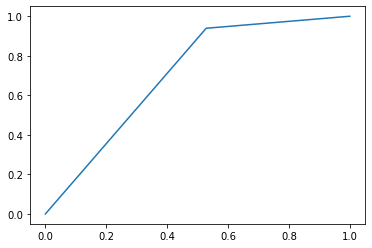

In [4]:
import numpy as np
import matplotlib.pyplot as plt

conf_mat = cll.get_confusion_matrix(datosTic,proporcionTest=0.3)

err = (conf_mat[0,1] + conf_mat[1,0])/np.sum(conf_mat)
print("Tasa de error: ",err)

tpr = conf_mat[0,0] / np.sum(conf_mat[0])
fpr = conf_mat[1,0] / np.sum(conf_mat[1])
print("Tasa de verdaderos positivos: ",tpr)
print("Tasa de falsos positivos: ", fpr)

x = [0, fpr, 1]
y = [0, tpr, 1]

plt.plot(x,y)
plt.savefig("roc.png")